# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [21]:
def deriv(f, x, h):

    return (-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [22]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [10]:
from math import log
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def der_1(f, x, h):
    return (f(x+h)-f(x))/(h)

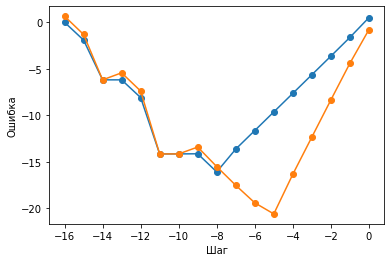

In [25]:
x = 1
plt.figure()
x1 = [0.1**i for i in range(17)]
error1 = [(der_1(f,x,x1[i]) - fder(x))**2 for i in range(len(x1))]
error2 = [(deriv(f,x,x1[i]) - fder(x))**2 for i in range(len(x1))]
plt.plot(np.log10(x1),np.log10((error1)),'-o')
plt.plot(np.log10(x1),np.log10(error2),'-o')
plt.xlabel('Шаг')
plt.ylabel('Ошибка')
plt.show()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [26]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Теперь в роли остатка только третья производная, поскольку производные предыдущих порядков равны нулю. Она пропориональна $\dfrac{1}{x}$, поэтому падение не неквадратичное, а линейное.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [35]:
def midpoint_rule(func, a, b, eps):
    n = 1
    I = 0
    I1 = float('inf')
    a1 = a
    x1 = [a]
    while np.abs(I-I1) > eps:
        I1 = I
        n = 2*n
        x1 = (b - a) / n
        x_real = np.linspace(a + x1/2, b - x1/2, n)
        integ = [func(x00) for x00 in x_real]
        I = np.sum(integ) * x1
    return I,n

def f1(x):
    return x**4

In [36]:
for i in range(1,5):
    print(np.log2(midpoint_rule(f1, 0, 1, 1/2**(10*i))[1]))

5.0
10.0
15.0
20.0


### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [37]:
def ff(x):
    return np.sin(x**0.5)/x

In [38]:
midpoint_rule(ff, 0, 1, eps = 1e-4)

(1.8919572892043148, 8388608)

У нас получилась слишком большая сетка для довольно посредственной точности, попробуем это исправить: 

$\dfrac{sin{\sqrt{x}}}{x}_{x \Rightarrow 0} \Rightarrow \dfrac{1}{\sqrt{x}} \Rightarrow \int{\dfrac{sin{\sqrt{x}}}{x}}_{x \Rightarrow 0} \Rightarrow \int{\dfrac{1}{\sqrt{x}}}_{x \Rightarrow 0} $ - совсем плохо

Прибавим и вычтем интграл, значение которого мы знаем:

$\int_{0}^{1} {\dfrac{1}{\sqrt{x}}} = 2$

Тогда:

$\int_0^1 \frac{\sin{\sqrt{x}}}{x} = I + 2$, где $ I = \int_0^1 \left(\frac{\sin{x}}{x} - \frac{1}{\sqrt{x}}\right) $

In [39]:

def ff1(x):
    return ff(x)-x**(-0.5)


In [40]:
integrate = midpoint_rule(ff1, 0, 1, eps = 1e-4)

In [41]:

integrate[0] + 2 , integrate[1]

(1.892113005639548, 32)